In [1]:
# Install Libraries
# If running on google colab, please restart runtime after installing packages

!pip install langdetect
!pip install pyLDAvis
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_md-0.4.0.tar.gz
!pip install scispacy

     |████████████████████████████████| 983kB 4.8MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp37-none-any.whl size=993193 sha256=909db26e9ef0694e706e23dd7309549b1d1c507dec64e5a6949e66dcd52121b0
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect
     |████████████████████████████████| 1.7MB 5.2MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.3MB 445kB/s 
     |████████████████████████████████| 9.9MB 39.3MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-cp37-none-any.whl size=136870 sha256=3afc41607d0047098013d3232a8d259312430b32f974ae19e350d67d5f687cd0
  Stored in directory: /root/.cache/pip/wheels/a0/9c/fc/c6e00689d35c82cf96a8adc70edfe7ba7904374fdac3240ac2
Successfully built pyLDAvis
ERROR: tensorflow 2.4

     |████████████████████████████████| 125.2MB 45kB/s 
     |████████████████████████████████| 12.8MB 136kB/s 
     |████████████████████████████████| 9.1MB 36.0MB/s 
     |████████████████████████████████| 460kB 44.4MB/s 
     |████████████████████████████████| 1.1MB 44.9MB/s 
     |████████████████████████████████| 122kB 38.5MB/s 
  Created wheel for en-core-sci-md: filename=en_core_sci_md-0.4.0-cp37-none-any.whl size=125733933 sha256=cb7deaf32ab7d7c32f7fd9e67e6f26e628d0a23e356a7133c52feec11fa53e71
  Stored in directory: /root/.cache/pip/wheels/94/31/9c/e922ffb928b7dc57fb74efcda963cf26d4d2bc1c6b9da1a469
  Created wheel for smart-open: filename=smart_open-3.0.0-cp37-none-any.whl size=107098 sha256=a205e54951cd68d89edcf5784219e6d6b4e1ff2c3873dd1f1c557c6c3c1e9b99
  Stored in directory: /root/.cache/pip/wheels/18/88/7c/f06dabd5e9cabe02d2269167bcacbbf9b47d0c0ff7d6ebcb78
Successfully built en-core-sci-md smart-open
  Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-

In [1]:
# Import Libraries

import csv
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from gensim.parsing.preprocessing import remove_stopwords, STOPWORDS
import scispacy
import spacy
import string
import re
import pyLDAvis.sklearn
import en_core_sci_md

# Check python version
import sys 
print(sys.version)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_least_angle.py:169: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not 

3.7.10 (default, Feb 20 2021, 21:17:23) 
[GCC 7.5.0]


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Overarching theme and question

As COVID-19 spreading globally and triggering a worldwide pandemic, more and more research papers regarding COVID-19 are published. Keeping up with every single one of them is an impossible task, however, by utilizing NLP tools and text minning, we could extract useful information on characteristics of COVID-19 virus to gain a deeper understanding of this global outbreak. And then propose a plan to tackle this ourbreak. In this analysis, I choose to explore the transmission of COVID-19, because I believe that we can better control the spreading if we understand how it transmits. 

# Load data
This dataset contains 497905 research papers and it does not contain null values.

In [3]:
# Loading from Google drive
data_path = '/content/drive/MyDrive/Colab Notebooks/final project/metadata.csv'
df = pd.read_csv(data_path)

# Loading from local
# df = pd.read_csv('metadata.csv')

df.info(verbose=True)
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497906 entries, 0 to 497905
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cord_uid          497906 non-null  object 
 1   sha               172105 non-null  object 
 2   source_x          497906 non-null  object 
 3   title             497674 non-null  object 
 4   doi               281753 non-null  object 
 5   pmcid             182522 non-null  object 
 6   pubmed_id         241936 non-null  object 
 7   license           497906 non-null  object 
 8   abstract          363064 non-null  object 
 9   publish_time      497687 non-null  object 
 10  authors           484020 non-null  object 
 11  journal           464755 non-null  object 
 12  mag_id            0 non-null       float64
 13  who_covidence_id  197568 non-null  object 
 14  arxiv_id          6687 non-null    object 
 15  pdf_json_files    172105 non-null  object 
 16  pmc_json_files    13

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


## Part 1 Data Cleaning

Steps performed in this section are:

Step 1: Selecting related columns  
Step 2: Filtering only transmission related papers  
Step 3: Biomedical specific text processing  
Step 4: Split date to year and month  
Step 5: Label paper languages based on abstract

Step 1: Only related columns such as title, abstract, authors and publish date are selected from this dataset for further investigation. Duplicate entries are dropped. However, many papers are exactly the same with only minor differences in abstract such as punctuations or symbols. These papers are perserved to prevent over cleaned dataset.

In [4]:
# load the meta data from the CSV file and extract out fields that will be useful to our application
df = df[['title','abstract','authors','publish_time']]
df = df.drop_duplicates(subset='abstract', keep='first')
df = df.dropna()
df['abstract'] = df['abstract'].str.lower()
df['title'] = df['title'].str.lower()
df.head()

,title,abstract,authors,publish_time
0,clinical features of culture-proven mycoplasma...,objective: this retrospective chart review des...,"Madani, Tariq A; Al-Ghamdi, Aisha A",2001-07-04
1,nitric oxide: a pro-inflammatory mediator in l...,inflammatory diseases of the respiratory tract...,"Vliet, Albert van der; Eiserich, Jason P; Cros...",2000-08-15
2,surfactant protein-d and pulmonary host defense,surfactant protein-d (sp-d) participates in th...,"Crouch, Erika C",2000-08-25
3,role of endothelin-1 in lung disease,endothelin-1 (et-1) is a 21 amino acid peptide...,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",2001-02-22
4,gene expression in epithelial cells in respons...,respiratory syncytial virus (rsv) and pneumoni...,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",2001-05-11


Step 2: Since we want to investigate transmission of COVID-19, only research papers that contain the word 'transmi' are selected to proceed. There are 30128 research papers in total.

In [5]:
# Select transmission related articles
data_df = df[df['abstract'].str.contains('transmis')]
data_df

,title,abstract,authors,publish_time
17,logistics of community smallpox control throug...,background: previous smallpox ring vaccination...,"Porco, Travis C; Holbrook, Karen A; Fernyak, S...",2004-08-06
59,transmission patterns of smallpox: systematic ...,background: because smallpox (variola major) m...,"Bhatnagar, Vibha; Stoto, Michael A; Morton, Sa...",2006-05-05
60,reliability of case definitions for public hea...,background: case definitions have been recogni...,"Krause, Gérard; Brodhun, Bonita; Altmann, Dori...",2006-05-10
62,sentinel surveillance for human enterovirus 71...,background: a major outbreak of human enterovi...,"Podin, Yuwana; Gias, Edna LM; Ong, Flora; Leon...",2006-07-07
82,the waiting time for inter-country spread of p...,background: the time delay between the start o...,"Caley, Peter; Becker, Niels G.; Philp, David J.",2007-01-03
...,...,...,...,...
497811,"emerging infections, the international health ...",abstract when breaches in the species barrier ...,"Heymann, D. L.; Reinhardt, K.",2014-12-31
497844,infecciones nosocomiales en pediatría,numerosas son las particularidades de la pobla...,"Burgard, M.; Grall, I.; Descamps, P.; Zahar, J...",2013-06-30
497866,neuro-oncology practice guidelines from a high...,background: during the coronavirus 19 (covid-1...,"Luther, Evan; Burks, Joshua; Eichberg, Daniel ...",2020-12-16
497873,antagonistes du récepteur ccr5 et infection pa...,ccr5 molecule is a chemokine receptor with an ...,"Psomas, K.C.; Corbeau, P.; Reynes, J.",2010-02-18


Step 3: Textual data in both title and abstract columns are cleaned using biomedical pretrained model offered by scispacy library: 'en_core_sci_md'. Cleaning process includes converting to lowerer case, removing punctuations, lemmatizing and removing stop words. The cleaned data is stored in clean_abs and clean_title columns.

In [6]:
import warnings
warnings.filterwarnings("ignore")

# Data cleaning, removing stop words and lemmatizing
def sanitize_txt(text):
    # set to lowercase
    text = text.lower()
    
    # remove puctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # lemmatize text
    text = lemmatizing(text)

    # remove stop words (gensin)
    text = remove_stopwords(text.lower())
    text = text.replace('-pron-', '')
  
    return text

nlp = spacy.load("en_core_sci_md")

def lemmatizing(text):
    doc = nlp(text) 
    tokens = [token for token in doc] 
    lemmatized_sentence = ' '.join([token.lemma_ for token in doc]) 
    return lemmatized_sentence

In [ ]:
# Note that this code snippet takes 60 minutes to run.
data_df['clean_abs'] = data_df['abstract'].apply(sanitize_txt)
data_df['clean_title'] = data_df['title'].apply(sanitize_txt)

Date data is converted in to year and year + month, stored in two separate columns: clean_year and clean_date, we can extract time sensitive information from these columns.

In [ ]:
def split_datetime(text):

    #Process time into years and months
    tmp = text.split("-") 
    if len(tmp) > 1:
        text = tmp[0] + '-' + tmp[1]
    else:
        text = tmp[0] + '-01'
    return text

def get_year(text):

    #Process time into years and months
    tmp = text.split("-") 
    return tmp[0]    

data_df['clean_date'] = data_df['publish_time'].apply(split_datetime)
data_df['clean_year'] = data_df['publish_time'].apply(get_year)

Step 4: Because dataset contains multiple languages, I want to investigate the distribution of each language, so I used language detection library to label each paper into a language short code stored in language column. Abstract is used for language detection as titles can be short string and will might be inaccurate to detect.

In [ ]:
from langdetect import detect
data_df['language'] = data_df['abstract'].apply(detect)

In [ ]:
# Drop NaN after data processing
data_df = data_df.dropna()

Due to expensive computation time of data cleaning, the processed data is stored in a csv.

In [7]:
# Save to google drive
# data_df.to_csv('/content/drive/MyDrive/Colab Notebooks/final project/clean_df.csv', index=False)

# Save to local
# data_df.to_csv('clean_df.csv', index=False)

# Loading from Google drive
data_path = '/content/drive/MyDrive/Colab Notebooks/final project/clean_df.csv'
data_df = pd.read_csv(data_path)

# Loading from local
# data_df = pd.read_csv('clean_df.csv')

Final processed data:

In [8]:
data_df.dropna(inplace=True)
print(data_df.isna().sum())
data_df

title           0
abstract        0
authors         0
publish_time    0
clean_abs       0
clean_title     0
clean_date      0
clean_year      0
language        0
dtype: int64


,title,abstract,authors,publish_time,clean_abs,clean_title,clean_date,clean_year,language
0,logistics of community smallpox control throug...,background: previous smallpox ring vaccination...,"Porco, Travis C; Holbrook, Karen A; Fernyak, S...",2004-08-06,background previous smallpox ring vaccination ...,logistic community smallpox control contact tr...,2004-08,2004,en
1,transmission patterns of smallpox: systematic ...,background: because smallpox (variola major) m...,"Bhatnagar, Vibha; Stoto, Michael A; Morton, Sa...",2006-05-05,background smallpox variola major use biologic...,transmission pattern smallpox systematic revie...,2006-05,2006,en
2,reliability of case definitions for public hea...,background: case definitions have been recogni...,"Krause, Gérard; Brodhun, Bonita; Altmann, Dori...",2006-05-10,background case definition recognize important...,reliability case definition public health surv...,2006-05,2006,en
3,sentinel surveillance for human enterovirus 71...,background: a major outbreak of human enterovi...,"Podin, Yuwana; Gias, Edna LM; Ong, Flora; Leon...",2006-07-07,background major outbreak human enterovirus 71...,sentinel surveillance human enterovirus 71 sar...,2006-07,2006,en
4,the waiting time for inter-country spread of p...,background: the time delay between the start o...,"Caley, Peter; Becker, Niels G.; Philp, David J.",2007-01-03,background time delay start influenza pandemic...,wait time intercountry spread pandemic influenza,2007-01,2007,en
...,...,...,...,...,...,...,...,...,...
27300,"emerging infections, the international health ...",abstract when breaches in the species barrier ...,"Heymann, D. L.; Reinhardt, K.",2014-12-31,abstract breach specie barrier animal human re...,emerge infection international health regulati...,2014-12,2014,en
27301,infecciones nosocomiales en pediatría,numerosas son las particularidades de la pobla...,"Burgard, M.; Grall, I.; Descamps, P.; Zahar, J...",2013-06-30,numerosas son las particularidade la población...,infeccione nosocomiales en pediatría,2013-06,2013,es
27302,neuro-oncology practice guidelines from a high...,background: during the coronavirus 19 (covid-1...,"Luther, Evan; Burks, Joshua; Eichberg, Daniel ...",2020-12-16,background coronavirus 19 covid19 pandemic phy...,neurooncology practice guideline highvolume su...,2020-12,2020,en
27303,antagonistes du récepteur ccr5 et infection pa...,ccr5 molecule is a chemokine receptor with an ...,"Psomas, K.C.; Corbeau, P.; Reynes, J.",2010-02-18,ccr5 molecule chemokine receptor important rol...,antagoniste du récepteur ccr5 et infection par...,2010-02,2010,en


## Part 2 Exploratory Analysis

### 1. Research paper time distribution
From this research paper and time distribution, it is observed that majority of transmission related papers are published after 2019 and more specifically after December 2019. This is closely cohesive to the timeline when first COVID-19 case is reported in China. After which the science community spent tremendous amount of effort researching on properties of COVID-19 in order to tackle the ourbreak.

Due to this observation, I will filter out research papers before year of 2019 to focus only on coronavirus related papers.

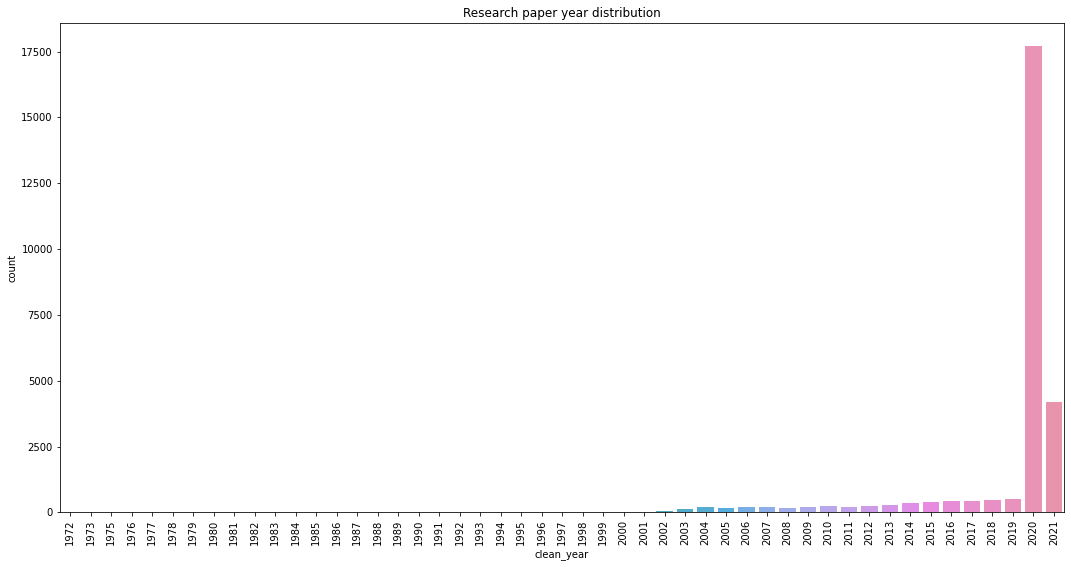

In [9]:
test_df = data_df.sort_values('clean_year', ascending=True)
plt.figure(figsize=(18, 9))
plt.xticks(rotation='vertical')
plt.title('Research paper year distribution')
sns.countplot(test_df['clean_year'])

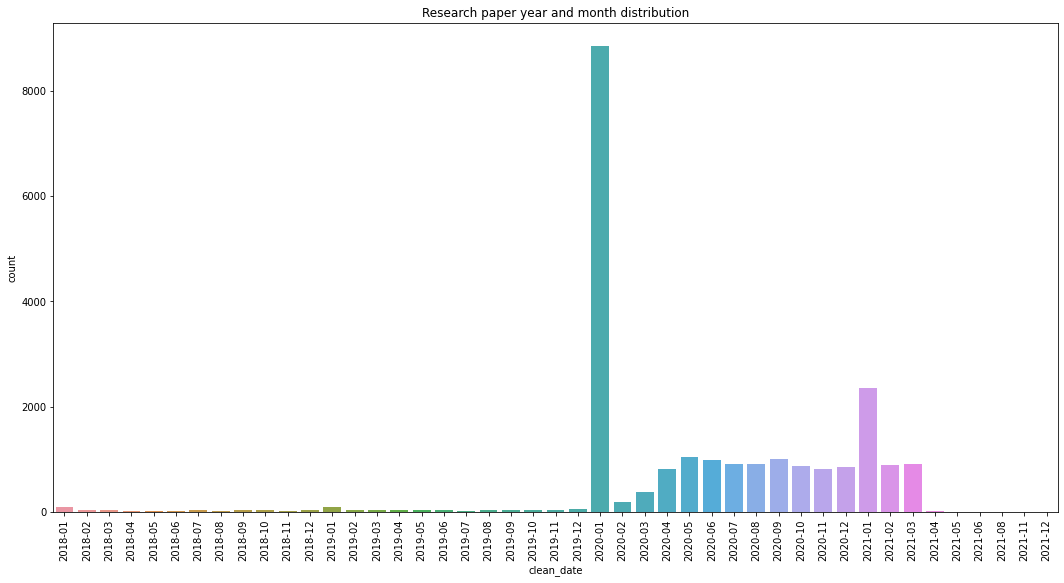

In [10]:
test_df = data_df.sort_values('clean_date', ascending=True)
test_df = test_df[test_df['clean_date'] > '2018']
plt.figure(figsize=(18, 9))
plt.title('Research paper year and month distribution')
plt.xticks(rotation='vertical')
sns.countplot(test_df['clean_date'])

### 2. Word cloud
I plotted two word clouds for title and abstract respectively to explore the most frequently mentioned words in transmission related research papers. Top 300 most mentioned words are selected.

For both words clouds, we can see that COVID-19 is the most frequent word, hence we can conclude that majority of transmission related research papers are about COVID-19, there is no need to perform further filtering on the dataset.

Both words cloud selected "sars-cov-2" because COVID-19 is a variation of sars and it inherits many similarities from sars which can help us to develop stratigic plans to control the spreading or develop vaccines.

Other spread prevention related words such as infection, respiratory, droplet, lockdown, detection, isolation, vaccine, contact and intervention are mentioned frequently. This provides some general ideas on how to control the spreading of COVID-19. 

Moreover, it is observed that word cloud for abstract contains pretty much all words in titles, which means abstract itself is carrying enough information, hence I will only use abstract data when perform topic modelling in next section.

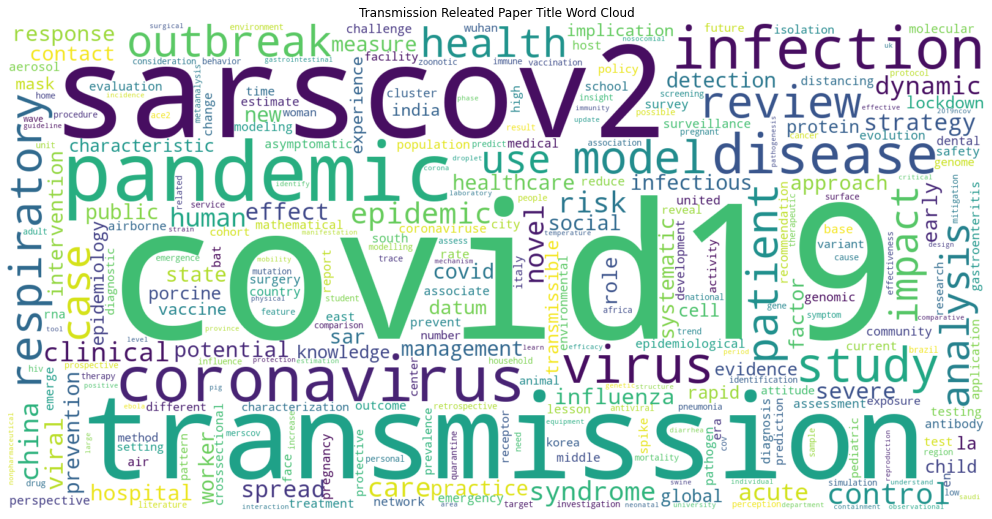

In [11]:
# Generate word cloud
from wordcloud import WordCloud, STOPWORDS

wordscloud_txt = ' '.join(txt for txt in data_df['clean_title'])
wordcloud = WordCloud(collocations=False, max_words=300, background_color="white", width=1600, height=800).generate(wordscloud_txt)

# Display the generated image:
plt.figure(figsize=(18, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Transmission Releated Paper Title Word Cloud')
plt.show()

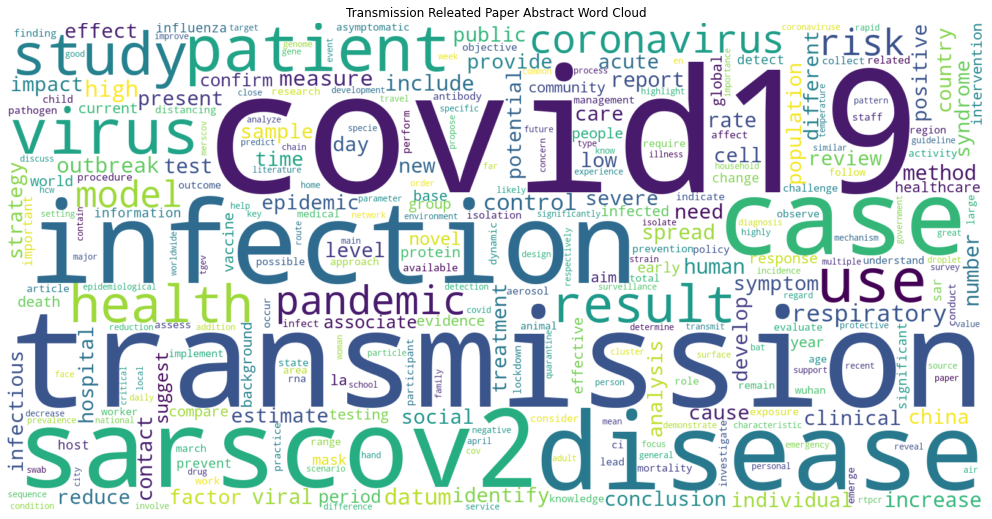

In [ ]:
wordscloud_txt = ' '.join(txt for txt in data_df['clean_abs'])
wordcloud = WordCloud(collocations=False, max_words=300, background_color="white", width=1600, height=800).generate(wordscloud_txt)

# Display the generated image:
plt.figure(figsize=(18, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Transmission Releated Paper Abstract Word Cloud')
plt.show()

### 3. Research paper language distribution

Since this dataset contains research papers in many different languages, I want to explore and percentile and distribution of each language to estimate their effect on this analysis and if textual data need to be processed in different languages separately.

This figure shows that over 98% of the research papers are written in English, which means English papers should be able to represent this dataset well enough, hence only English papers are used in topic modelling for next section.

en    26802
es      249
pt      127
fr      105
ru       10
nl        4
de        3
hu        2
ca        1
ro        1
Name: language, dtype: int64


Text(0.5, 1.0, 'Research paper language distribution')

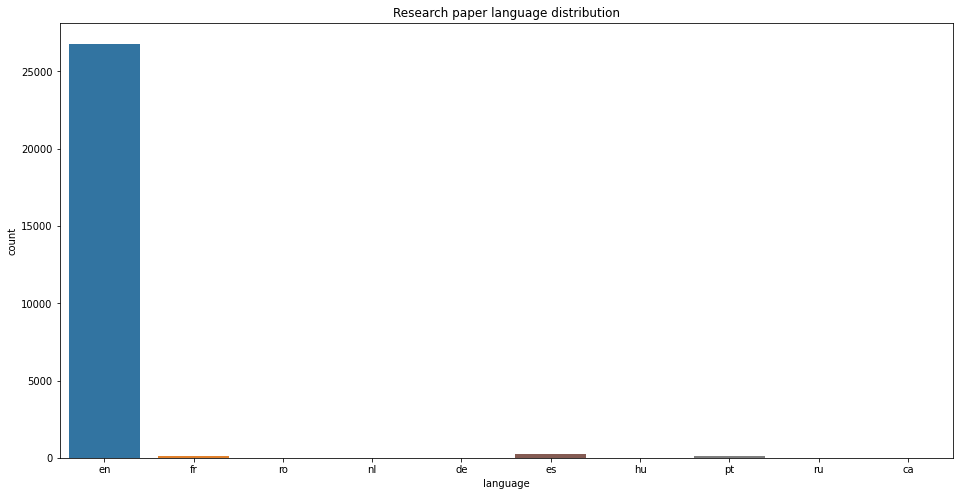

In [ ]:
print(data_df['language'].value_counts())
plt.figure(figsize=(16, 8))
sns.countplot(data_df['language'])
plt.title('Research paper language distribution')

## Part 3 Models

In order to explore the transmission of COVID-19 in research paper dataset, I implemented topic modeling to discover topics that are presented in these papers. Two unsupervised models are implemented this section: Latent Dirichlet Allocation and Non-negative Matrix Factorization. Even though LDA and NMF use different mathematical approaches, both can be applied to find topics in a documents corpus. In this analysis, I explored both models and compare which one returns better topics lists. Model results are presented below. Moreover, to get deeper insights into incubation, transmission, control measures of COVID-19, I implemented a very simple recommandation system using nearest neighbour to find similar related papers based on a input question. 

Steps are shown below:

**Step 1: Data preparation:**

Based on findings from data exploration section, dataset is further filtered to only include English research papers after 2019.


**Step 2: Vectorizing textual data:**

Textual data is vectorized using both bag of words and TF-IDF. 

**Step 3: Building Models:**

Total of 13 topics are selected from each model. And top 15 most frequent words are also returned by each model. Clustered topics and correpsonding words are printed for each model.

**Step 4: Model Tuning:**

Models are only manually tuned in order to acheive the most reasonable topics. Because for unsupervised models, we cannot compare models by loss function repected to a target value. So I inspected output topics manually to tune this model. Hyperparamters selected and the reasons are listed below:

- LDA:

  ***random_state=7:*** to ensure comparable results  
  ***learning_method=online:*** to deal with large dataset, online will perform faster than batch  
  ***learning_offset=50:*** to downweight early iterations in online learning

- NMF:

  ***alpha=0.1:*** to regularize model  
  ***l1_ratio=0.5:*** to balance both l1 and l2 regularizations  
  ***init='nndsvd':*** init method that is better for sparse data

**Step 5: Model Results:**

By briefly examining topics returned by each model, I think LDA returns more specific and related topics such as public areas infections, vaccines, genomic relationships between sars and COVID-19, datum of spreading and population estimation, animal/human transmissions, mask pretection etc. NMF model selected some interesting topics as well such as maternal infections. This will also be taken into considerations when propose COVID-19 transmission control measures.

Since LDA outperform NMF in terms of topic selection, it will be used in next step to recommand similar papers.

The complete topic lists for each model is shown in table below:

|Topics selected by LDA  | Topics selected by NMF  |
|------------------------|-------------------------|
|sarscov2 genome sequence analysis virus variant mutation transmission strain region identify influenza cluster viral datum|respiratory coronavirus disease syndrome severe acute sarscov2 virus cause 2019 covid19 human review infection treatment|
|covid19 study patient 95 child age 2020 ci year participant result high group conclusion method|model epidemic number parameter dynamic estimate rate use datum intervention reproduction disease control mathematical individual|
|case covid19 transmission number epidemic estimate measure rate 2020 model contact infection outbreak country control|protein sarscov2 cell ace2 host human virus mutation viral spike receptor genome variant sequence bat|
|covid19 patient coronavirus disease respiratory severe 2019 acute syndrome sarscov2 case infection transmission clinical treatment|case covid19 2020 confirm number china report country day contact cluster outbreak wuhan february january|
|covid19 health pandemic public social transmission disease measure impact use community country response service need|sarscov2 test sample positive testing asymptomatic swab rtpcr rna detection symptom detect viral antibody assay|
|sarscov2 cell protein viral virus infection ace2 human receptor vaccine spike host drug response study|health covid19 pandemic social public measure knowledge care risk community practice country impact response distancing|
|virus human transmission disease infection animal pathogen vaccine sarscov2 review health cause infectious potential spread|aerosol droplet air dental airborne particle procedure surface risk virus transmission environment ventilation room use|
|care infection worker healthcare covid19 risk staff hospital practice hcw control health transmission measure use|woman pregnant pregnancy mother vertical neonate neonatal maternal newborn delivery birth infant outcome covid19 infection|
|model use transmission datum disease dynamic result parameter study method analysis network propose different individual|child school adult pediatric household year parent age infection young mild family asymptomatic closure contact|
|mask transmission use patient aerosol procedure risk air droplet covid19 surface dental surgical surgery sarscov2|ci 95 estimate interval household day serial associate rate study year confidence participant aor age|
|covid 19 cov detection sars sample diagnostic use merscov method assay detect wastewater gi water|mask face wear use respirator surgical cloth n95 protection filtration protective efficiency public ppe reduce|
|study review woman covid19 pregnant evidence search transmission infection include mother pregnancy report datum literature|patient covid19 care hospital surgery clinical procedure risk cancer treatment surgical symptom management disease medical|
|sarscov2 test positive testing sample patient infection asymptomatic symptom result viral day transmission swab case|hcw worker healthcare ppe hospital infection care staff risk exposure nosocomial equipment work protective personal|


In additional to topic list table, I also plotted an interactive visualization for both LDA and NMF. As shown, topic blobs for both models are well separated and non-overlapping. The most frequently occurred words for each topic is also listed as histogram. It is observed that LDA model produces more evenly topics where NMF has a few bigger topics.

**Step 6: Model Improvement:**

Since I am only using TF-IDF and bag of words without n-gram for vectorizing, these models do not analyze any contextual information and relationships. This can be improved by firstly using n-gram in count vectorizer or secondly utilizing more powerful pre-trained word embeddings such as BERT or FastText, especially the ones pre-trained on biomedical related text.

**Step 7: Recommand Similar Research Papers:**

Although some keywords and precautions are identified by topic modelling algorithms, it is still difficult to develop a plan without deeper insights of each topic. To address this, I implemented a simple recommandation system with nearest neighbour algorithm using the probability distance matrix computed by LDA model, where we can find similar papers of a chosen paper or just a random question. This can also help researchers to read papers and extract information more efficiently and being able to keep up with all latest publications in their interested fields. In this analysis, we can also use it to investigate details about transmission of COVID-19. 

From previous section, I list a few questions, each repsenting either a precaution or a transmission channel:

- How effective is surgical facial mask for protect virus spread?
- How COVID-19 virus transmit vertically by maternal pregnancy mothers and newborn baby?
- How healthcare hospital workers can be protected when exposed to risk of contact of COVID-19 virus?
- How to prevent COVID-19 virus infection in household and children in school?
- How is COVID-19 virus transmitted in public surface such as ventilation and air droplet?
- What is known about transmission, incubation, and environmental stability of coronavirus?

#### Data preparation

Filtered out papers that are not in English or before 2019 as justified in data exploration.

In [12]:
data_df.reset_index(drop=True, inplace=True)
data_df = data_df[data_df['language'] == 'en']
data_df = data_df[data_df['clean_year'] > 2018]

#### Vectorizing textual data

2000 features are selected from each vectorizer to reduce computation time. Other constraints such as maximum and minimum occurrance are also imposed.

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=2000)
tf = tf_vectorizer.fit_transform(data_df['clean_abs'])
tf_feature_names = tf_vectorizer.get_feature_names()
len(tf_feature_names)

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=2000)
tfidf = tfidf_vectorizer.fit_transform(data_df['clean_abs'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
len(tfidf_feature_names)

2000

#### Building Models and Model Tuning

In [14]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

topics = 13

# Run NMF
nmf = NMF(n_components=topics, random_state=7, alpha=0.1, l1_ratio=0.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_components=topics, max_iter=10, learning_method='online', learning_offset=50, random_state=7).fit(tf)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic ", topic_idx, " ".join(feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]))

#### Model Results

In [15]:
# Printing topics selected by each model
no_top_words = 15
print('------------------------------------------------------------------------')
print('NMF model clustered topics:')
print('------------------------------------------------------------------------')
display_topics(nmf, tf_feature_names, no_top_words)
print('------------------------------------------------------------------------')
print('LDA model clustered topics:')
print('------------------------------------------------------------------------')
display_topics(lda, tf_feature_names, no_top_words)

------------------------------------------------------------------------
NMF model clustered topics:
------------------------------------------------------------------------
Topic  0 respiratory coronavirus disease syndrome severe acute sarscov2 virus cause 2019 covid19 human review infection treatment
Topic  1 model epidemic number parameter dynamic estimate rate use datum intervention reproduction disease control mathematical individual
Topic  2 protein sarscov2 cell ace2 host human virus mutation viral spike receptor genome variant sequence bat
Topic  3 case covid19 2020 confirm number china report country day contact cluster outbreak wuhan february january
Topic  4 sarscov2 test sample positive testing asymptomatic swab rtpcr rna detection symptom detect viral antibody assay
Topic  5 health covid19 pandemic social public measure knowledge care risk community practice country impact response distancing
Topic  6 aerosol droplet air dental airborne particle procedure surface risk viru

#### Model Visualization

To visualize the clusters or topics of each model, I used pyLDAvis library to create interactive figures for each model. On the left side, it is a distance map showing distribution of topics selected by model. And when hover over a topic blob, we can view percentage of total documents that belongs to this topic on right side. Moreover, keywords distribution for each topic will also dynamically show on right side.

From these two figures, we can conclude that both LDA and NMF topcis are well separated and similarly distributed. Models overall selected different keywords: LDA output more virus and COVID-19 related words, while NMF outputs more mask, hcw related words. 

Note that this the saved pyLDAvis interactive figures can only display on google colab.

In [16]:
# Visualizing model topics of LDA
panel = pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer, mds='tsne')
pyLDAvis.display(panel)

In [17]:
# Visualizing model topics of NMF
panel = pyLDAvis.sklearn.prepare(nmf, tfidf, tfidf_vectorizer, mds='tsne')
pyLDAvis.display(panel)

#### Recommand similar/related research papers

Using distance matrix computed by LDA and nearest neighbour algorithm, we can implement a very simple recommandation system to find similar or related research papers based on a random question or an existing paper. Nearest neighbour is trained on ball tree algorithm.

Totol of 7 questions are listed based on insights observed from topic keywords. And for each question, 5 to 6 related research papers are returned by nearest neighbour model. We can dive into details of each paper to obtain deeper understandings and develop strategic plan accordingly.

Questions listed:
- How effective is surgical facial mask for protect virus spread?
- How COVID-19 virus transmit vertically by maternal pregnancy mothers and newborn baby?
- How healthcare hospital workers can be protected when exposed to risk of contact of COVID-19 virus?
- How to prevent COVID-19 virus infection in household and children in school?
- How is COVID-19 virus transmitted in public surface such as ventilation and air droplet?
- What is known about transmission, incubation, and environmental stability of coronavirus?

Note that in some cases, the same research papers are returned, this is due to the fact that this dataset contains the same paper with minor differences such as puntuations and symbols. Such data is perserved to void over cleaning and missing information.

In [ ]:
# Get documents and topic probability distribution as distance matrix using LDA
doc_topic_dist = pd.DataFrame(lda.transform(tf))
doc_topic_dist

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.000481,0.000481,0.000481,0.000481,0.000481,0.485906,0.000481,0.090296,0.000481,0.180772,0.000481,0.000481,0.238699
1,0.001202,0.098400,0.001202,0.001202,0.001202,0.699691,0.001202,0.079950,0.001202,0.001202,0.001202,0.111143,0.001202
2,0.474617,0.000463,0.000463,0.000463,0.000463,0.434638,0.000463,0.086111,0.000463,0.000463,0.000463,0.000463,0.000463
3,0.000631,0.000631,0.000631,0.092542,0.237872,0.000631,0.000631,0.603034,0.000631,0.060877,0.000631,0.000631,0.000631
4,0.137660,0.000699,0.000699,0.000699,0.000699,0.401783,0.000699,0.000699,0.108879,0.000699,0.000699,0.204199,0.141883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21957,0.000769,0.147738,0.000769,0.000769,0.000769,0.000769,0.000769,0.823076,0.000769,0.000769,0.000769,0.000769,0.021494
21958,0.024062,0.000538,0.071652,0.000538,0.355041,0.533893,0.000538,0.000538,0.000538,0.000538,0.000538,0.000538,0.011048
21959,0.000496,0.271332,0.000496,0.000496,0.000496,0.000496,0.060012,0.000496,0.207984,0.000496,0.456205,0.000496,0.000496
21960,0.000663,0.129118,0.000663,0.064769,0.000663,0.000663,0.000663,0.052167,0.018494,0.000663,0.730147,0.000663,0.000663


In [ ]:
from sklearn.neighbors import NearestNeighbors
ball_tree = NearestNeighbors(algorithm='ball_tree', leaf_size=20).fit(doc_topic_dist)

In [ ]:
def get_similar_doc(topics, n_neighbor, vectorizer, dist_model):
    test_nn = vectorizer.transform(topics)
    test_nn_pd = pd.DataFrame(dist_model.transform(test_nn))
    distances, indices = ball_tree.kneighbors(test_nn_pd, n_neighbors=n_neighbor)
    for i in range(len(topics)):
        print('Search text: ' + topics[i])
        print('-----------------------------------------------------------')
        for j in range(len(distances[i])):
            print('Distance: {}'.format(distances[i][j]))
            print('----------------------------------------------------------')
            print('Title: ')
            print(data_df.iloc[indices[i][j]].title)
            print('Abstract: ')
            print(data_df.iloc[indices[i][j]].abstract)
            print('----------------------------------------------------------')

How effective is facial mask for protect virus spread?

In [ ]:
q_str = ['How effective is facial mask for protect virus spread']
get_similar_doc(q_str, 5, tf_vectorizer, lda)

Search text: How effective is facial mask for protect virus spread
-----------------------------------------------------------
Distance: 0.08290026140638254
----------------------------------------------------------
Title: 
robots come to rescue: how to reduce perceived risk of infectious disease in covid19-stricken consumers?
Abstract: 
• during covid-19, people are more willing to visit a hotel/restaurant with robots. • people think that robots in hotels/restaurants can lower interpersonal interaction. • reducing interpersonal interaction can lower perceived viral transmission. • chinese are more likely to visit hotels/restaurants with robots than americans.
----------------------------------------------------------
Distance: 0.09614685506855207
----------------------------------------------------------
Title: 
robots come to rescue: how to reduce perceived risk of infectious disease in covid19-stricken consumers?
Abstract: 
â¢during covid-19, people are more willing to visit a hote

How COVID-19 virus transmit vertically by maternal pregnancy mothers and newborn baby?

In [ ]:
q_str = ['How COVID-19 virus transmit vertically by maternal pregnancy mothers and newborn baby']
get_similar_doc(q_str, 8, tf_vectorizer, lda)

Search text: How COVID-19 virus transmit vertically by maternal pregnancy mothers and newborn baby
-----------------------------------------------------------
Distance: 0.15752589465466113
----------------------------------------------------------
Title: 
pregnancy and covid-19: management and challenges
Abstract: 
the consequences of covid-19 infecting pregnant women and the potential risks of vertical transmission have become a major issue. since little is currently known about covid-19 in pregnancy, the understanding of covid-19 in this particular group will be updated in time, and a comprehensive review will be useful to evaluate the impact of covid-19 in pregnancy. based on recently published literature and official documents, this review provides an introduction to the pathogenesis, pathology, and clinical features of covid-19 and has focused on the current researches on clinical features, pregnancy outcomes and placental histopathological analysis from pregnant women infected wi

How healthcare hospital workers can be protected when exposed to risk of contact of COVID-19 virus?

In [ ]:
q_str = ['How healthcare hospital workers doctors can be protected when exposed to risk of contact of coronavirus']
get_similar_doc(q_str, 5, tf_vectorizer, lda)

Search text: How healthcare hospital workers doctors can be protected when exposed to risk of contact of coronavirus
-----------------------------------------------------------
Distance: 0.08564072733441053
----------------------------------------------------------
Title: 
exposure of hospital healthcare workers to the novel coronavirus (sars-cov-2).
Abstract: 
healthcare workers (hcws) are at higher risk of infection with the coronavirus disease 2019 (covid-19) and can also amplify outbreaks within healthcare facilities if they become ill. certain groups are known to be at higher risk of contracting severe covid-19 infection, such as men and people from black, asian and minority ethnic (bame) backgrounds. identifying and managing hcws who have been exposed to covid-19 is of utmost importance in preventing healthcare transmission and protecting staff and vulnerable patients in healthcare settings. recently, antibody testing to diagnose previous covid-19 exposure among hcw has commenced

How to prevent COVID-19 virus infection in household and children in school?

In [ ]:
q_str = ['How to prevent COVID-19 virus infection in household and children in school']
get_similar_doc(q_str, 5, tf_vectorizer, lda)

Search text: How to prevent COVID-19 virus infection in household and children in school
-----------------------------------------------------------
Distance: 0.18932557786262805
----------------------------------------------------------
Title: 
microbes on the mobile phones of healthcare workers in palestine: identification, characterization, and comparison
Abstract: 
background: healthcare workers (hcws) may be using their mobile phones (mps) to carry microbes that cause hospital-acquired and community infections in general. with antibiotic resistance problem emergence, these infections can be challenging to eradicate. hence, this study aimed to determine the microbial contamination of hcw mps and identify and classify bacterial isolates in palestine. methods: this was a 7-month comparative cross-sectional analysis of 200 hcw mps from 2 hospitals and 100 mps from university students (non-hcws). data collection was done using a self-administrated questionnaire, and a swab sample from 

How is COVID-19 virus transmitted in public surface such as ventilation and air droplet?

In [ ]:
q_str = ['How is COVID-19 virus transmitted in public surface such as ventilation and air droplet']
get_similar_doc(q_str, 8, tf_vectorizer, lda)

Search text: How is COVID-19 virus transmitted in public surface such as ventilation and air droplet
-----------------------------------------------------------
Distance: 0.09973039023325138
----------------------------------------------------------
Title: 
what is the best mouthrinse against coronaviruses?
Abstract: 
the person‐to‐person transmission of sars‐cov‐2 may occur directly or indirectly through saliva, and a preoperational use of antimicrobial mouthwash is considered to reduce the number of oral microbes. (1) chlorhexidine mouthwash has been a common antiseptic agent used in dentistry, both preoperative and postoperative use reducing post‐surgical infectious complications.
----------------------------------------------------------
Distance: 0.13086907831389483
----------------------------------------------------------
Title: 
there is no routine head and neck exam during the covid‐19 pandemic
Abstract: 
head and neck examinations are commonly performed by all physicians. in 

What is known about transmission, incubation, and environmental stability of coronavirus?

In [ ]:
q_str = ['What is known about transmission, incubation, and environmental stability of coronavirus']
get_similar_doc(q_str, 8, tf_vectorizer, lda)

Search text: What is known about transmission, incubation, and environmental stability of coronavirus
-----------------------------------------------------------
Distance: 0.06640305067277241
----------------------------------------------------------
Title: 
ticking bomb: prolonged faecal shedding of novel coronavirus (2019-ncov) and environmental implications
Abstract: 
the current global coronavirus disease 2019 (covid-19) pandemic caused by the severe acute respiratory syndrome coronavirus 2 (sars-cov-2) has been a tremendous public health challenge globally while the respiratory transmission of sars-cov-2 has been established, evolving reports on the impact of the gastrointestinal system and the prolonged faecal shedding of sars-cov-2 show the likelihood of faecally mediated transmission the increasing evidential presence of sars-cov-2 in wastewater and faecal material poses a significant public health threat which may potentiate global vulnerability to high risk of human exposure 

## Part 4: Deriving insights about policy and guidance to tackle the outbreak

**Model selection, pros and cons:**

In this analysis, I used unsupervised model to cluster collections of research papers because even without a target value, unsupervised models are capable of discovering natural intrinsic patterns inside a dataset. However, one challenge is that model result and performance is difficult to benchmark and measure. In this case, I manually inspected model result to tune hyperparameters and utilizing plots to visualize results to verify model performance.

**Insights about policy and guidance from models:**

First of all, a research paper search engine or recommendation system could reduce the overhead of finding related papers. This can help scientists and researchers to keep up with latest publications with less effort and being able to elaborate on publications about a specific subject internationally. As COVID-19 pandemic spreading globally, it will require collaborative effort from all countries and the entire biomedical science community to fight this outbreak. Tools created utilizing NLP algorithms such as this simple recommendation system could make the information extraction process much easier for researchers and scientists.

Secondly, based on result of question "What is known about transmission, incubation, and environmental stability of coronavirus?", we can conclude that factors such as temperature, humidity, surface air pollution can increase the diffusion rate of coronavirus, which means government need to issue more strict social distancing or isolation orders in high temperature, high humidity or higher PM value cities. Moreover, for other seasonal areas, more strict policies can also be issued as summer time comes.

Thirdly, coronavirus evidently spread faster among healthcare professions such as doctors and nurses who work in frontline and has close contact with patients. Hospitals could optimize the schedule of frequently used machines for coronavirus such as CT machines. Governments could incline sanitization supplies or protective wearables such as surgical masks, N95 masks and personal protective equipments to hospital first before releasing to public. Hospitals could also properly isolate patients to avoid cross infection and minimize infections between healthcare workers and patients. 

Fourthly, although maternal transmission remains unclear and infected rate is approximately the same as other populations. Some cases show that coronavirus can be detected in placental, especially when the mother exposed to the virus in early stage of pregnancy. We could recommend pregnant mothers to do routine COVID-19 testing throughout pregnancy and this could also be included in pregnancy preparation health check list as precautions.

Fifthly, how can we prevent the spreading of coronavirus in community and public areas. Government could issue school closure orders, stay at home orders to prevent spreading within communities, limit public area access such as parks, playground and camp sites, social distancing in indoor areas, prohibit gathering. As individuals, we could sanitize hands and surfaces more often and eliminate non-essential travel or shopping. Also wearing mask has been proven to be effective in terms of preventing airborne transmission and person to person transmission. Hence, every individual should wear masks in public. Government and industry could invest more into surgical mask production to solve the shortage.

Lastly, we learnt from the history that ultimate solution for global pandemic is vaccination. On example could be smallpox, which is another severe infectious disease that was controlled by effective vaccination. Therefore, biomedical companies and governments could dedicate resources into vaccine developing.



